## Import Libraries

In [44]:
import numpy as np
from sklearn.datasets  import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy

## Create Dataset

In [12]:
X1, y1 = make_blobs(n_samples= 100, centers= [[4, 4], [0, 1], [7, 2], [-4, -3]], cluster_std= 0.9)

In [5]:
X1[:5]

array([[3.46861648, 3.21359218],
       [8.1971092 , 2.92354504],
       [2.48728258, 4.32284727],
       [4.13316455, 2.4339938 ],
       [6.66849337, 2.18688795]])

In [7]:
y1

array([0, 3, 0, 0, 2, 0, 0, 3, 1, 2, 1, 3, 1, 1, 0, 3, 3, 2, 2, 2, 3, 0,
       2, 2, 3, 1, 0, 2, 1, 3, 2, 2, 2, 3, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2,
       0, 3, 3, 3, 0, 3, 1, 1, 3, 0, 1, 2, 3, 2, 1, 2, 3, 1, 3, 3, 0, 3,
       1, 0, 0, 1, 1, 2, 0, 0, 3, 1, 1, 2, 3, 2, 2, 3, 0, 2, 2, 2, 3, 3,
       2, 0, 2, 3, 1, 0, 2, 1, 0, 1, 1, 0])

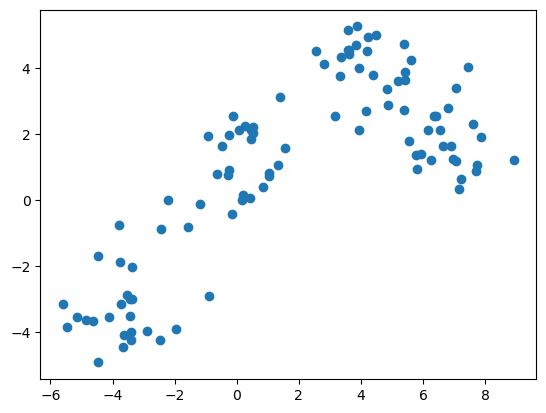

In [13]:
plt.scatter(X1[:, 0], X1[:, 1], marker="o")
plt.show()

In [14]:
agglom = AgglomerativeClustering(n_clusters= 4, linkage= "average")

In [15]:
agglom.fit(X1, y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

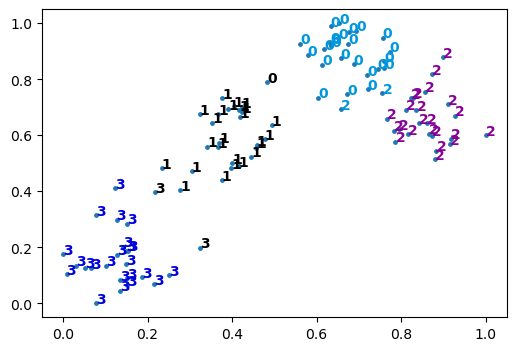

In [39]:
fig = plt.figure(figsize=(6, 4))

x_min, x_max = np.min(X1, axis= 0), np.max(X1, axis= 0)

X1 = (X1 - x_min) / (x_max - x_min)

for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]), color= plt.cm.nipy_spectral(agglom.labels_[i]/10),
            fontdict= {"weight": "bold", "size": 10})
    
plt.scatter(X1[:, 0], X1[:, 1], marker="o", s= 6)
plt.show()

In [42]:
distance = distance_matrix(X1 , X1)
distance

array([[0.        , 0.41641074, 0.56303829, ..., 0.19711663, 0.26077496,
        0.85778675],
       [0.41641074, 0.        , 0.1674365 , ..., 0.55139773, 0.16658478,
        0.45800521],
       [0.56303829, 0.1674365 , 0.        , ..., 0.71334572, 0.30230656,
        0.39114126],
       ...,
       [0.19711663, 0.55139773, 0.71334572, ..., 0.        , 0.42273703,
        0.95010587],
       [0.26077496, 0.16658478, 0.30230656, ..., 0.42273703, 0.        ,
        0.6239005 ],
       [0.85778675, 0.45800521, 0.39114126, ..., 0.95010587, 0.6239005 ,
        0.        ]])

In [45]:
Z = hierarchy.linkage(distance, "complete")

/var/folders/6d/7p8150cn1qq03p3t9h0xpkrm0000gn/T/ipykernel_49561/3216895863.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(distance, "complete")


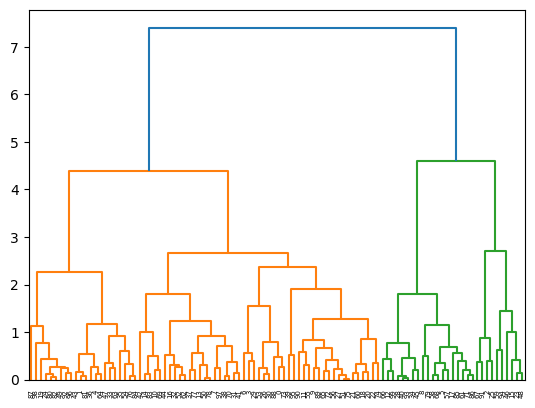

In [46]:
dendro = hierarchy.dendrogram(Z)